In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
from qiskit.quantum_info.operators import Operator

In [2]:
SEARCHED_STRING = "11011011"

N = len(SEARCHED_STRING)
oracle = np.zeros(shape=(2 ** N, 2 ** N))
for b in range(2 ** N):
    if np.binary_repr(b, N) == SEARCHED_STRING:
        oracle[b, b] = -1
    else:
        oracle[b, b] = 1
        
diffusion = 2.0 * np.full((2 ** N, 2 ** N), 1 / (2 ** N)) - np.eye(2 ** N)        

#print(oracle)
#print(diffusion)

In [3]:
circuit = QuantumCircuit(N, N)

for i in range(N):
    circuit.i(i)

for i in range(N):
    circuit.h(i)

In [4]:
oracle_gate = Operator(oracle)
diffusion_gate = Operator(diffusion)

In [5]:
N_ITER = int(np.pi / 4 * np.sqrt(2 ** N))

In [6]:
oracle_diffusion_qubit_targets = []

for i in range(N):
    oracle_diffusion_qubit_targets.append(i)
    
for i in range(N_ITER):
    circuit.unitary(oracle_gate, oracle_diffusion_qubit_targets, label='oracle_gate')

    circuit.unitary(diffusion_gate, oracle_diffusion_qubit_targets, label='diffusion_gate')

{'1101': 963, '1011': 3, '0101': 1, '1010': 1, '1000': 4, '0000': 2, '1001': 4, '1111': 2, '1100': 3, '0001': 4, '0100': 2, '1110': 5, '0010': 3, '0111': 3}


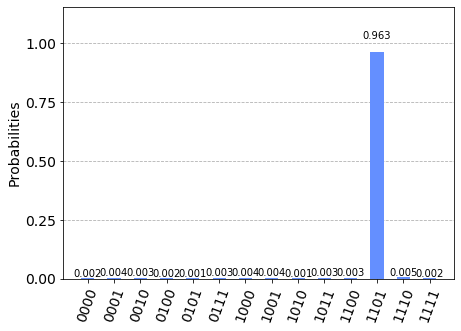

In [12]:
circuit.measure(oracle_diffusion_qubit_targets, oracle_diffusion_qubit_targets)

simulator = Aer.get_backend('qasm_simulator')

job = execute(circuit, simulator, shots=1000)

result = job.result()

counts = result.get_counts(circuit)

#print(counts)
plot_histogram(counts)

In [8]:
#circuit.draw()